In [1]:
%%javascript
$('.output_result').css('font-size', '5pt')

<IPython.core.display.Javascript object>

# Option Pricing - Founations of Rik Management

## Load Standard Libraries

In [2]:
import sys
!{sys.executable} --version

import warnings
import pathlib
from finquant.portfolio import build_portfolio
import math
from math import log, e, sqrt, pi, exp
from scipy import stats
from scipy.stats import norm
import numpy as np
np.bool = np.bool_
from numpy import array, dot
import random
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas_datareader import data as pdr
import yahoo_fin.options as ops
from yahoo_fin import options
pd.set_option('display.max_rows', None)
import datetime as dt
import yfinance as yf
from yahoo_fin import stock_info as si
warnings.filterwarnings("ignore")
yf.pdr_override()

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

Python 3.12.0


## Get Ticker List

In [3]:
# Get S&P 500 ticker list from wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table_class = "wikitable sortable jquery-tablesorter"
response=requests.get(url)
print(response.status_code)

200


In [4]:
# Parse data from html
soup = BeautifulSoup(response.text, 'html.parser')
wikiticks = soup.find('table',{'class':"wikitable"})

In [5]:
# Create dataframe from downloaded table
df = pd.read_html(str(wikiticks))

# convert list to dataframe
df = pd.DataFrame(df[0])

print('Dateframe size ->', df.shape)

print('\n', df.head(2))
print('\n', df.tail(2))

Dateframe size -> (503, 8)

   Symbol     Security  GICS Sector         GICS Sub-Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   

   Headquarters Location  Date added    CIK Founded  
0  Saint Paul, Minnesota  1957-03-04  66740    1902  
1   Milwaukee, Wisconsin  2017-07-26  91142    1916  

     Symbol              Security  GICS Sector GICS Sub-Industry  \
501   ZION  Zions Bancorporation   Financials    Regional Banks   
502    ZTS                Zoetis  Health Care   Pharmaceuticals   

      Headquarters Location  Date added      CIK Founded  
501    Salt Lake City, Utah  2001-06-22   109380    1873  
502  Parsippany, New Jersey  2013-06-21  1555280    1952  


In [6]:
# Drop unneeded columns
dff = df.drop(['GICS Sector', 'GICS Sub-Industry', 'Headquarters Location', 'Date added', 'CIK', 'Founded'], axis = 1)

# Rename columns
dff = dff.rename(columns={'Symbol': 'Ticker'})

print(dff.head(2))
print('\n', dff.head(2))

  Ticker     Security
0    MMM           3M
1    AOS  A. O. Smith

   Ticker     Security
0    MMM           3M
1    AOS  A. O. Smith


In [7]:
# Create sub-list from wikipedia ticker list
dff = dff.drop('Security', axis = 1)
ticks = dff['Ticker'].tolist()

dff.head(2)

,Ticker
0,MMM
1,AOS


## Get Historical Stock Price Data

[*********************100%%**********************]  503 of 503 completed


3 Failed downloads:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1695956946")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 -> 2023-09-28 23:09:06.837773)')


Adj Close                                        \
                             A        AAL       AAPL       ABBV ABNB   
Date                                                                   
2020-01-02 00:00:00  83.779129  28.982893  73.152641  74.906532  NaN   
2020-01-03 00:00:00  82.433990  27.548195  72.441460  74.195518  NaN   

                                                                               \
                           ABT       ACGL         ACN        ADBE         ADI   
Date                                                                            
2020-01-02 00:00:00  81.280266  43.400002  198.402527  334.429993  112.303558   
2020-01-03 00:00:00  80.289368  43.349998  198.072098  331.809998  110.326607   

                                                                              \
                           ADM         ADP        ADSK        AEE        AEP   
Date                                                                           
2020-01-02 00:00:00  41.768387  157.518631  187.830002  68.730438  81.160934   
2020-01-03 00:00:00  41.686852  157.185669  184.949997  68.757545  81.074120   

                                                                             \
                           AES        AFL        AIG         AIZ        AJG   
Date                                                                          
2020-01-02 00:00:00  17.799782  48.241657  46.450272  122.621307  90.826523   
2020-01-03 00:00:00  17.595390  47.907089  46.091312  123.204918  90.636330   

                                                                              \
                          AKAM        ALB        ALGN        ALK         ALL   
Date                                                                           
2020-01-02 00:00:00  87.639999  69.960663  283.679993  67.785583  102.307846   
2020-01-03 00:00:00  87.239998  68.958611  280.440002  66.542633  102.316902   

                                                                            \
                           ALLE       AMAT      AMCR        AMD        AME   
Date                                                                         
2020-01-02 00:00:00  119.573227  59.824528  8.944034  49.099998  98.247765   
2020-01-03 00:00:00  118.095146  58.872334  8.826236  48.599998  98.384201   

                                                                               \
                           AMGN         AMP         AMT       AMZN       ANET   
Date                                                                            
2020-01-02 00:00:00  212.332321  156.687439  208.863419  94.900497  51.180000   
2020-01-03 00:00:00  210.890839  154.733826  208.963943  93.748497  50.212502   

                                                                               \
                           ANSS         AON        AOS        APA         APD   
Date                                                                            
2020-01-02 00:00:00  259.589996  202.193726  44.347729  23.826839  211.961380   
2020-01-03 00:00:00  256.970001  201.399658  43.957813  24.136890  207.247925   

                                                                               \
                           APH       APTV         ARE         ATO         AVB   
Date                                                                            
2020-01-02 00:00:00  52.566780  96.065666  142.445709   99.859810  181.562363   
2020-01-03 00:00:00  52.018162  93.861275  143.257248  100.520241  183.305817   

                                                                    \
                           AVGO         AVY         AWK       AXON   
Date                                                                 
2020-01-02 00:00:00  284.935577  121.607094  112.440025  76.559998   
2020-01-03 00:00:00  277.688263  120.854759  113.169678  73.930000   

                                                                               \
               

Adj Close                                             \
                              A    AAL        AAPL        ABBV        ABNB   
Date                                                                         
2023-09-27 00:00:00  110.277657  12.61  170.205750  151.612442  134.029999   
2023-09-28 00:00:00  111.774643  12.92  170.465424  150.741165  136.470001   

                                                                               \
                           ABT       ACGL         ACN        ADBE         ADI   
Date                                                                            
2023-09-27 00:00:00  95.004089  81.080002  313.081512  502.600006  172.809998   
2023-09-28 00:00:00  97.579834  81.639999  299.527710  504.670013  176.410004   

                                                                              \
                           ADM         ADP        ADSK        AEE        AEP   
Date                                                                           
2023-09-27 00:00:00  75.889542  242.630005  202.279999  76.110001  75.005791   
2023-09-28 00:00:00  75.571518  243.309998  207.889999  74.440002  73.829185   

                                                                              \
                           AES        AFL        AIG         AIZ         AJG   
Date                                                                           
2023-09-27 00:00:00  15.753119  76.632690  61.009998  145.119843  230.330002   
2023-09-28 00:00:00  14.714777  77.269386  61.279999  143.656296  230.770004   

                                                                    \
                           AKAM         ALB        ALGN        ALK   
Date                                                                 
2023-09-27 00:00:00  106.959999  162.630005  301.679993  36.410000   
2023-09-28 00:00:00  107.040001  172.399994  307.510010  36.830002   

                                                                               \
                            ALL        ALLE        AMAT      AMCR         AMD   
Date                                                                            
2023-09-27 00:00:00  113.019997  103.290001  134.770416  8.909535   98.070000   
2023-09-28 00:00:00  112.489998  104.260002  137.923645  9.047668  102.760002   

                                                                     \
                            AME        AMGN         AMP         AMT   
Date                                                                  
2023-09-27 00:00:00  148.860001  266.881592  325.618011  158.093307   
2023-09-28 00:00:00  148.820007  268.707245  329.004181  160.697006   

                                                                     \
                           AMZN        ANET        ANSS         AON   
Date                                                                  
2023-09-27 00:00:00  125.980003  181.600006  294.339996  329.262939   
2023-09-28 00:00:00  125.980003  184.429993  297.859985  328.723999   

                                                                             \
                           AOS        APA         APD        APH       APTV   
Date                                                                          
2023-09-27 00:00:00  65.141136  42.135315  283.519836  82.360001  95.860001   
2023-09-28 00:00:00  66.166283  41.986179  285.119995  84.080002  99.139999   

                                                                    \
                           ARE         ATO         AVB        AVGO   
Date                                                                 
2023-09-27 00:00:00  97.649994  105.701927  170.789993  816.809998   
2023-09-28 00:00:00  99.309998  105.155846  171.289993  832.000000   

                                                                     \
                            AVY         AWK        AXON         AXP   
Date                                                             

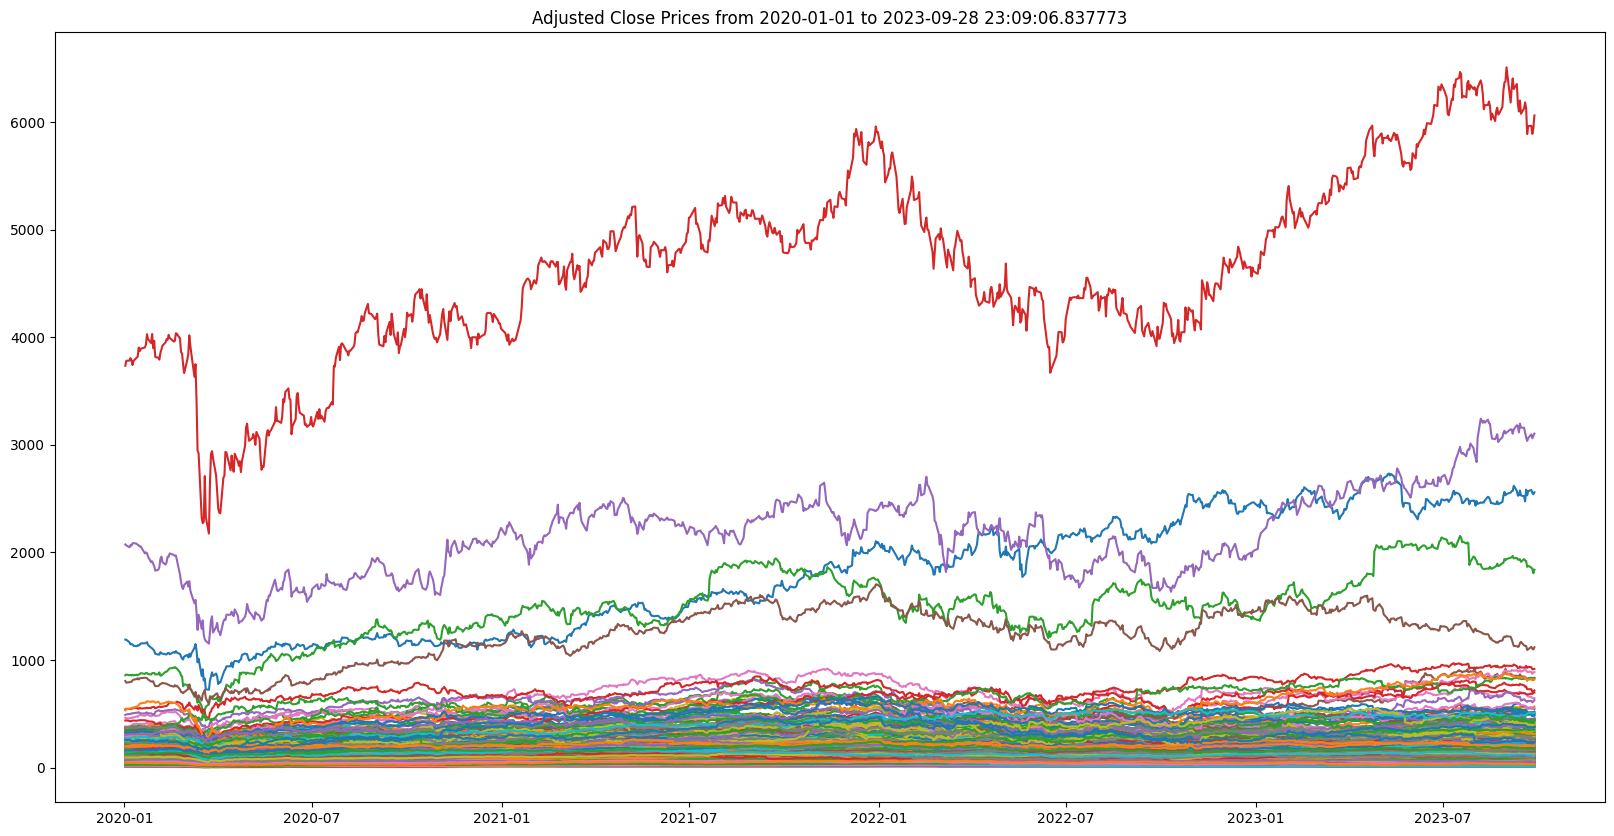

In [8]:
# Create list of S&P tickers
tickers = ticks
pd.set_option('display.max_columns', 1000)
# initializing Parameters
start = "2020-01-01"
end = pd.Timestamp('today') - dt.timedelta(days = 60)

# Get all S&P Stock Prices
tickers_df = pdr.DataReader(tickers, start, end)

display(tickers_df.head(2))
display(tickers_df.tail(2))

# Display 
plt.figure(figsize = (20,10))
plt.title('Adjusted Close Prices from {} to {}'.format(start, end))
plt.plot(tickers_df['Adj Close'])
plt.show()

## Calculating Returns to Classify the Dataset According to Best Returns

### Find Tickers with Highest Returns and lowest Volatility

In [9]:
cols = list(tickers_df.columns.values)

tickers_f = tickers_df['Adj Close'] #[['Adj Close', 'Volume']]
display(tickers_f.tail(4))

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,AVB,AVGO,AVY,AWK,AXON,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF.B,BG,BIIB,BIO,BK,BKNG,BKR,BLK,BMY,BR,BRK.B,BRO,BSX,BWA,BX,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDAY,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COR,COST,CPB,CPRT,CPT,CRL,CRM,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DLR,DLTR,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXCM,EA,EBAY,ECL,ED,EFX,EG,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FI,FICO,FIS,FITB,FLT,FMC,FOX,FOXA,FRT,FSLR,FTNT,FTV,GD,GE,GEHC,GEN,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KVUE,L,LDOS,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNT,LOW,LRCX,LULU,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWS,NWSA,NXPI,O,ODFL,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PCAR,PCG,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PLD,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PXD,PYPL,QCOM,QRVO,RCL,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,RVTY,SBAC,SBUX,SCHW,SEDG,SEE,SHW,SJM,SLB,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VFC,VICI,VLO,VLTO,VMC,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WHR,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-25 00:00:00,111.714767,12.91,175.848328,153.117371,134.139999,96.933411,81.150002,315.680695,511.600006,175.429993,76.823753,240.020004,205.669998,79.550003,77.794029,16.059675,76.393929,62.130001,147.031403,233.250000,107.610001,166.889999,298.019989,37.360001,115.239998,103.989998,136.297150,9.067401,97.379997,152.509995,264.778107,334.302490,164.063004,131.270004,181.179993,301.730011,334.861755,64.165764,40.783165,287.843292,83.260002,99.080002,99.624916,109.693306,175.890717,833.890015,185.050003,131.939255,193.240005,152.602997,2580.300049,198.779999,27.600000,49.290001,37.500000,32.866493,69.790001,266.769989,24.621841,NaN,110.002792,255.020004,353.179993,42.459560,3097.909912,35.697803,657.549988,58.565582,185.089996,NaN,71.963898,53.799999,41.279999,109.343987,58.647179,40.494232,27.928104,88.695206,53.369282,272.860077,212.229996,155.369995,74.980003,92.309998,13.90,64.980003,231.250000,204.413864,123.136292,111.950607,85.509491,26.151821,93.558258,85.589996,440.019989,294.339996,106.639999,71.746361,130.760941,41.450001,44.577522,200.850006,1859.689941,229.772110,55.441208,70.570000,28.085520,97.317955,331.350006,119.861000,186.734879,557.596680,41.590420,43.369999,96.670273,197.570007,206.339996,53.096523,78.120003,31.150000,504.247406,45.790001,26.374702,69.439171,51.270000,71.952400,166.959854,46.119999,47.910000,37.455173,73.360001,383.039917,86.8650

### Sample Extract and Find Correlations

In [10]:
sp_sample = tickers_f.sample(frac = .05, axis = 1)

print('\n', sp_sample.shape)
sp_sample.tail(2)


 (942, 25)


,ANSS,GE,BIO,UDR,PG,NCLH,AEE,MAA,ODFL,GILD,TRV,CPT,ICE,IBM,VTRS,HRL,CDW,LUV,AVY,KHC,MRK,SEDG,LLY,FITB,CNC
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-27 00:00:00,294.339996,110.889999,352.470001,34.973881,146.415863,16.290001,76.110001,126.732162,399.890015,75.550003,167.919998,93.879997,108.269997,141.564499,9.467314,38.007359,198.121902,26.809999,182.029999,34.029999,103.940002,128.009995,548.746094,24.510000,69.739998
2023-09-28 00:00:00,297.859985,112.339996,356.119995,35.250587,145.422134,16.940001,74.440002,127.593071,406.049988,75.419998,167.619995,94.620003,110.820000,139.992325,9.684500,37.709881,202.299927,27.219999,183.539993,33.750000,104.300003,130.740005,543.445862,25.030001,69.260002


In [11]:
returns = sp_sample.applymap(log).diff()[1:]

# annualize returns and covariance

stats = returns.agg(['mean', 'median', 'std', 'var'])
annual_returns = stats.transpose()['mean'] * 252
annual_covar = returns.cov() * 252
display(round(stats, 4))
display(round(annual_covar, 4))
print(round(annual_returns, 4))

ticker_list = list(annual_returns.index)

covar_indep = annual_covar.copy()
for t1 in ticker_list:
    for t2 in ticker_list:
        if t1 != t2:
            covar_indep.loc[t1,t2] = 0.0
            
display(round(covar_indep, 4))

,ANSS,GE,BIO,UDR,PG,NCLH,AEE,MAA,ODFL,GILD,TRV,CPT,ICE,IBM,VTRS,HRL,CDW,LUV,AVY,KHC,MRK,SEDG,LLY,FITB,CNC
mean,0.0001,0.0005,-0.0000,-0.0001,0.0003,-0.0013,0.0001,0.0001,0.0012,0.0003,0.0003,0.0000,0.0002,0.0003,-0.0007,-0.0001,0.0004,-0.0007,0.0004,0.0002,0.0003,0.0003,0.0016,-0.0001,0.0001
median,0.0007,0.0004,0.0009,0.0002,0.0007,-0.0019,0.0006,0.0003,0.0019,-0.0003,0.0013,0.0007,0.0005,0.0008,-0.0008,0.0007,0.0006,-0.0009,0.0005,0.0003,0.0001,0.0001,0.0009,0.0000,0.0000
std,0.0240,0.0266,0.0230,0.0212,0.0142,0.0550,0.0177,0.0197,0.0230,0.0168,0.0201,0.0198,0.0174,0.0178,0.0244,0.0146,0.0221,0.0275,0.0217,0.0183,0.0155,0.0440,0.0206,0.0307,0.0240
var,0.0006,0.0007,0.0005,0.0004,0.0002,0.0030,0.0003,0.0004,0.0005,0.0003,0.0004,0.0004,0.0003,0.0003,0.0006,0.0002,0.0005,0.0008,0.0005,0.0003,0.0002,0.0019,0.0004,0.0009,0.0006


,ANSS,GE,BIO,UDR,PG,NCLH,AEE,MAA,ODFL,GILD,TRV,CPT,ICE,IBM,VTRS,HRL,CDW,LUV,AVY,KHC,MRK,SEDG,LLY,FITB,CNC
ANSS,0.1453,0.0615,0.0790,0.0563,0.0399,0.1100,0.0444,0.0578,0.0794,0.0315,0.0409,0.0564,0.0613,0.0426,0.0472,0.0202,0.0804,0.0573,0.0628,0.0373,0.0302,0.1295,0.0411,0.0735,0.0483
GE,0.0615,0.1790,0.0376,0.0726,0.0304,0.2174,0.0436,0.0603,0.0648,0.0253,0.0749,0.0621,0.0461,0.0649,0.0630,0.0170,0.0820,0.1167,0.0809,0.0476,0.0327,0.0904,0.0328,0.1346,0.0604
BIO,0.0790,0.0376,0.1336,0.0316,0.0330,0.0523,0.0333,0.0369,0.0554,0.0258,0.0220,0.0369,0.0461,0.0274,0.0356,0.0159,0.0500,0.0312,0.0446,0.0239,0.0269,0.0804,0.0348,0.0393,0.0408
UDR,0.0563,0.0726,0.0316,0.1130,0.0342,0.1197,0.0584,0.0917,0.0505,0.0227,0.0620,0.0935,0.0509,0.0490,0.0470,0.0203,0.0653,0.0697,0.0630,0.0410,0.0302,0.0640,0.0335,0.0976,0.0580
PG,0.0399,0.0304,0.0330,0.0342,0.0507,0.0322,0.0413,0.0370,0.0331,0.0264,0.0304,0.0359,0.0330,0.0328,0.0233,0.0281,0.0337,0.0249,0.0372,0.0381,0.0268,0.0243,0.0334,0.0363,0.0363
NCLH,0.1100,0.2174,0.0523,0.1197,0.0322,0.7626,0.0404,0.1003,0.1156,0.0173,0.1088,0.1023,0.0759,0.1060,0.1204,0.0037,0.1538,0.2656,0.1255,0.0655,0.0277,0.2331,0.0239,0.2435,0.0771
AEE,0.0444,0.0436,0.0333,0.0584,0.0413,0.0404,0.0791,0.0591,0.0361,0.0290,0.0461,0.0574,0.0401,0.0413,0.0254,0.0310,0.0451,0.0355,0.0488,0.0420,0.0294,0.0441,0.0376,0.0517,0.0461
MAA,0.0578,0.0603,0.0369,0.0917,0.0370,0.1003,0.0591,0.0974,0.0492,0.0219,0.0557,0.0902,0.0512,0.0454,0.0399,0.0224,0.0619,0.0538,0.0582,0.0390,0.0279,0.0659,0.0346,0.0828,0.0541
ODFL,0.0794,0.0648,0.0554,0.0505,0.0331,0.1156,0.0361,0.0492,0.1328,0.0225,0.0402,0.0475,0.0470,0.0440,0.0387,0.0165,0.0684,0.0630,0.0616,0.0371,0.0265,0.0981,0.0315,0.0766,0.0470
GILD,0.0315,0.0253,0.0258,0.0227,0.0264,0.0173,0.0290,0.0219,0.0225,0.0715,0.0248,0.0231,0.0212,0.0276,0.0266,0.0217,0.0306,0.0185,0.0248,0.0280,0.0268,0.0188,0.0316,0.0324,0.0233


ANSS    0.0368
GE      0.1140
BIO    -0.0118
UDR    -0.0339
PG      0.0704
NCLH   -0.3334
AEE     0.0214
MAA     0.0289
ODFL    0.3129
GILD    0.0804
TRV     0.0765
CPT     0.0039
ICE     0.0612
IBM     0.0737
VTRS   -0.1728
HRL    -0.0189
CDW     0.1037
LUV    -0.1808
AVY     0.1102
KHC     0.0628
MRK     0.0779
SEDG    0.0670
LLY     0.3942
FITB   -0.0158
CNC     0.0302
Name: mean, dtype: float64


,ANSS,GE,BIO,UDR,PG,NCLH,AEE,MAA,ODFL,GILD,TRV,CPT,ICE,IBM,VTRS,HRL,CDW,LUV,AVY,KHC,MRK,SEDG,LLY,FITB,CNC
ANSS,0.1453,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
GE,0.0000,0.179,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
BIO,0.0000,0.000,0.1336,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
UDR,0.0000,0.000,0.0000,0.113,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
PG,0.0000,0.000,0.0000,0.000,0.0507,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
NCLH,0.0000,0.000,0.0000,0.000,0.0000,0.7626,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
AEE,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0791,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
MAA,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0974,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
ODFL,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.1328,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
GILD,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0715,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000


In [12]:
print('\nCorrelation Matrix')
corr = sp_sample.corr()
print (corr.tail())

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("\nTop Absolute Correlations")
print(get_top_abs_correlations(returns).tail())


Correlation Matrix
          ANSS        GE       BIO       UDR        PG      NCLH       AEE  \
MRK  -0.286120  0.554040 -0.496424  0.006079  0.647102 -0.358625  0.574867   
SEDG  0.400448  0.264703  0.499562  0.429863  0.568225 -0.175057  0.558606   
LLY  -0.131960  0.669535 -0.319142  0.205585  0.739575 -0.361694  0.602544   
FITB  0.309881  0.379754  0.564800  0.854849  0.565436  0.188351  0.599715   
CNC  -0.300423 -0.078539  0.051749  0.513996  0.508125 -0.273045  0.713080   

           MAA      ODFL      GILD       TRV       CPT       ICE       IBM  \
MRK   0.215977  0.685120  0.798811  0.738901  0.070303  0.088514  0.750382   
SEDG  0.591806  0.515848  0.059800  0.612828  0.540360  0.597205  0.311219   
LLY   0.395281  0.841192  0.687521  0.775075  0.273556  0.312113  0.831315   
FITB  0.899504  0.570458 -0.046032  0.677620  0.895403  0.757963  0.498019   
CNC   0.652318  0.373686  0.062890  0.573888  0.641337  0.254623  0.486996   

          VTRS       HRL       CDW       L

In [13]:
pf = build_portfolio(data = sp_sample)
pf.properties()

----------------------------------------------------------------------
Stocks: ANSS, GE, BIO, UDR, PG, NCLH, AEE, MAA, ODFL, GILD, TRV, CPT, ICE, IBM, VTRS, HRL, CDW, LUV, AVY, KHC, MRK, SEDG, LLY, FITB, CNC
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.116
Portfolio Volatility: 0.234
Portfolio Downside Risk: 0.206
Portfolio Value at Risk: 0.501
Confidence level of Value at Risk: 95.00 %
Portfolio Sharpe Ratio: 0.472
Portfolio Sortino Ratio: 0.537

Skewness:
      ANSS        GE     BIO       UDR        PG      NCLH       AEE  \
0 -0.07078  0.213154  0.5508  0.258298 -0.421082  2.136267 -0.287867   

        MAA      ODFL      GILD       TRV       CPT       ICE       IBM  \
0  0.081381 -0.027433  0.740005 -0.610051  0.379996  0.087077 -0.129365   

       VTRS       HRL       CDW       LUV       AVY       KHC      MRK  \
0  0.665186 -0.132533 -0.596684  0.522837 -0.558102 -0.769277  0.78583   

       SEDG       LLY      FITB       CNC  
0 -0.864187  0.8

# Efficient Frontear Portfolio Selection

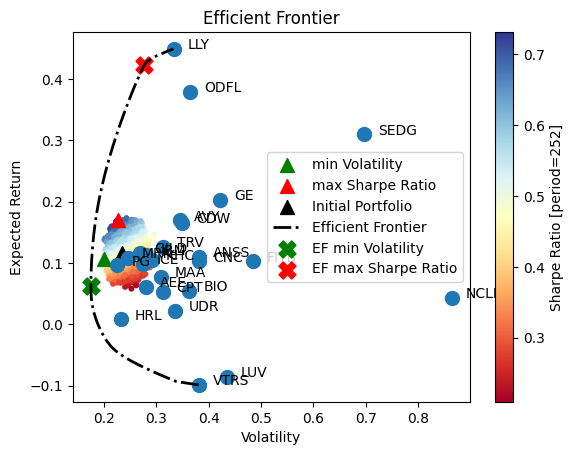

In [14]:
# Monte Carlo optimisation
opt_w, opt_res = pf.mc_optimisation(num_trials = 100000)
pf.mc_plot_results()

# minimisation to compute efficient frontier and optimal portfolios along it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()

# plotting individual stocks
pf.plot_stocks()

In [15]:
# Download prices
S0_df = yf.download('FCX', start, end)

# Set the index to a datetime type
S0_df.index = pd.to_datetime(S0_df.index)

# Display the last five rows
display(S0_df.head())
S0_df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,13.35,13.45,13.13,13.20,12.654632,22771700
2020-01-03,13.00,13.09,12.79,12.80,12.271158,20401300
2020-01-06,12.63,12.93,12.53,12.85,12.319092,19145300
2020-01-07,12.94,13.19,12.84,13.05,12.510829,20849500
2020-01-08,13.13,13.31,12.98,13.18,12.635459,17484700


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-22,37.860001,37.970001,37.099998,37.150002,37.000000,7816000
2023-09-25,36.750000,37.240002,36.419998,37.200001,37.049801,6611100
2023-09-26,36.570000,37.299999,36.349998,36.570000,36.422340,11739900
2023-09-27,36.770000,36.959999,36.040001,36.549999,36.402424,10358400
2023-09-28,37.029999,37.490002,36.919998,37.330002,37.179276,10314500


In [16]:
S0_df = pd.read_csv('/Users/Luchano/Documents/Education/Rutgers/FSRM/Fall 2023/FCX.csv', index_col = 0)

fcx_returns = S0_df['FCX_Adj_Close_F'].pct_change(1)

# Calculate daily volatility
vol1 = fcx_returns.std()
μ = fcx_returns.mean()

S0_df.tail()

,FCX_Adj_Close_F
Date,
2023-08-23,39.101479
2023-08-24,38.244953
2023-08-25,38.175236
2023-08-28,38.802692
2023-08-29,40.027725


In [17]:
pf = build_portfolio(data = S0_df)

pf.properties()

----------------------------------------------------------------------
Stocks: FCX_Adj_Close_F
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.472
Portfolio Volatility: 0.561
Portfolio Downside Risk: 0.414
Portfolio Value at Risk: 1.395
Confidence level of Value at Risk: 95.00 %
Portfolio Sharpe Ratio: 0.832
Portfolio Sortino Ratio: 1.129

Skewness:
   FCX_Adj_Close_F
0        -0.678633

Kurtosis:
   FCX_Adj_Close_F
0        -0.775659

Information:
  Allocation             Name
0        1.0  FCX_Adj_Close_F
----------------------------------------------------------------------


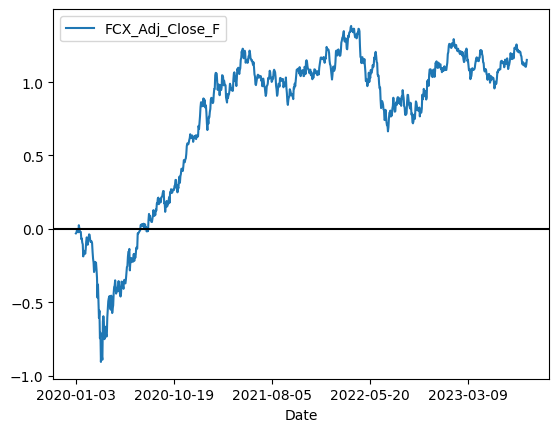

In [18]:
pf.comp_daily_log_returns().cumsum().plot().axhline(y=0, color="black")
plt.show()

# Calculate Option Prices

In [19]:
# Get sample tickerisk_free list

ticks = sp_sample.columns.tolist()

In [20]:
FCX = pdr.YahooOptions('FCX')

FCX.headers = {'User-Agent': 'Safari'}


for exp in FCX.expiry_dates:
    exp.isoformat() # print(exp.isoformat())
    #display(FCX.expiry_dates)

# Get all available data for puts, calls and expiration
opt = FCX.get_all_data()

# Sample reference option expiry dates
#[datetime.date(2023, 11, 10),
# datetime.date(2023, 11, 17),
# datetime.date(2023, 11, 24)]


# Get target dates

#FCX_11_17 = options.get_options_chain('FCX', '2023-11-17')
#FCX_11_24 = options.get_options_chain('FCX', '2023-11-24')
FCX_12_01 = options.get_options_chain('FCX', '2023-12-01')
FCX_12_08 = options.get_options_chain('FCX', '2023-12-08')
FCX_12_15 = options.get_options_chain('FCX', '2023-12-15')
FCX_12_22 = options.get_options_chain('FCX', '2023-12-22')


#options.reset_index(inplace=True)

# perform calculation on the data.
#CAG_11_03['mid_price'] = (options.Ask - options.Bid) / 2

#print(CAG_11_03['mid_price'])

display(FCX_12_01['calls'].tail())
display(FCX_12_01['puts'].tail())

display(FCX_12_08['calls'].tail())
display(FCX_12_08['puts'].tail())

display(FCX_12_15['calls'].tail())
display(FCX_12_15['puts'].tail())

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
19,FCX231201C00042000,2023-11-21 10:03AM EST,42.0,0.02,0.0,0.02,0.0,-,2,20,57.81%
20,FCX231201C00043000,2023-11-22 10:40AM EST,43.0,0.01,0.0,0.01,0.0,-,350,381,62.50%
21,FCX231201C00044000,2023-10-18 9:53AM EST,44.0,0.15,0.0,0.05,0.0,-,-,58,85.16%
22,FCX231201C00045000,2023-11-21 3:44PM EST,45.0,0.02,0.0,0.05,0.0,-,1,1,93.75%
23,FCX231201C00046000,2023-10-19 10:59AM EST,46.0,0.06,0.0,0.07,0.0,-,1,1,107.03%


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
23,FCX231201P00038500,2023-11-24 12:33PM EST,38.5,1.67,1.92,1.96,0.0,-,5,5,34.77%
24,FCX231201P00039000,2023-11-24 11:11AM EST,39.0,2.13,2.38,2.49,0.0,-,1,65,46.09%
25,FCX231201P00040000,2023-11-14 9:57AM EST,40.0,4.75,3.35,3.50,0.0,-,7,7,60.94%
26,FCX231201P00041000,2023-10-26 8:55AM EST,41.0,7.30,4.15,4.25,0.0,-,-,0,0.00%
27,FCX231201P00042000,2023-11-22 1:38PM EST,42.0,5.25,5.35,5.45,0.0,-,5,3,72.27%


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
10,FCX231208C00039000,2023-11-27 3:24PM EST,39.0,0.11,0.11,0.13,-0.09,-45.00%,57,781,31.93%
11,FCX231208C00040000,2023-11-27 1:27PM EST,40.0,0.05,0.04,0.07,-0.04,-44.44%,7,154,34.57%
12,FCX231208C00041000,2023-11-27 3:16PM EST,41.0,0.03,0.02,0.04,0.00,-,1,126,37.50%
13,FCX231208C00042000,2023-11-20 3:45PM EST,42.0,0.04,0.00,0.02,0.00,-,30,25,39.06%
14,FCX231208C00043000,2023-11-24 10:19AM EST,43.0,0.01,0.00,0.06,0.00,-,1,3,53.13%


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
14,FCX231208P00038000,2023-11-27 9:33AM EST,38.0,1.97,1.59,1.65,0.52,+35.86%,1,75,28.71%
15,FCX231208P00039000,2023-11-15 11:23AM EST,39.0,3.02,2.43,2.68,0.00,-,7,6,40.92%
16,FCX231208P00041000,2023-10-30 11:12AM EST,41.0,6.87,4.30,4.60,0.00,-,-,0,53.32%
17,FCX231208P00042000,2023-10-26 9:04AM EST,42.0,8.38,4.70,5.60,0.00,-,-,0,61.13%
18,FCX231208P00050000,2023-11-15 10:30AM EST,50.0,13.70,13.30,13.50,0.00,-,-,0,97.27%


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
27,FCX231215C00046000,2023-11-21 9:41AM EST,46.0,0.04,0.0,0.06,0.0,-,2,220,55.08%
28,FCX231215C00047000,2023-11-08 3:29PM EST,47.0,0.02,0.0,0.05,0.0,-,3,113,51.56%
29,FCX231215C00048000,2023-11-27 11:09AM EST,48.0,0.01,0.0,0.06,0.0,-,61,90,57.03%
30,FCX231215C00050000,2023-11-02 1:30PM EST,50.0,0.01,0.0,0.05,0.0,-,2,33,62.50%
31,FCX231215C00055000,2023-09-28 9:56AM EST,55.0,0.05,0.0,0.03,0.0,-,98,148,73.44%


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
26,FCX231215P00043000,2023-11-01 2:14PM EST,43.0,9.30,6.35,6.45,0.0,-,380,0,38.67%
27,FCX231215P00044000,2023-10-17 2:58PM EST,44.0,7.60,8.35,8.55,0.0,-,5,0,101.17%
28,FCX231215P00045000,2023-10-23 2:19PM EST,45.0,11.47,8.00,8.15,0.0,-,7,0,0.00%
29,FCX231215P00046000,2023-11-07 10:06AM EST,46.0,11.90,9.30,9.55,0.0,-,-,0,64.84%
30,FCX231215P00047000,2023-09-28 10:02AM EST,47.0,10.05,13.15,13.45,0.0,-,2,0,188.09%


In [21]:
FCX_12_01['Implied_Volatility_calls'] = FCX_12_01['calls']['Implied Volatility'].str.replace('%', '')

vol_c = pd.DataFrame(FCX_12_01['Implied_Volatility_calls'])

vol_c['Implied_Volatility_calls'] = vol_c.astype(float)

## Calculate Option Prices using Monte Carlo Simulation

In [22]:
# Options parameters

S0 = S0_df['FCX_Adj_Close_F'][-1]
K = FCX_12_01['calls']['Strike'][21]
vol = vol_c['Implied_Volatility_calls'][21]/100

# risk free rate => 10yr Treasury note
risk_free = float(0.0484)

# Time to maturity
T = 1.0

# Number of trading days
td = 250

# Binomial
N = 1000

print('FCX Price (t-1): ', round(S0, 3))
print('FCX Strike Price (t-1): ', K)

FCX Price (t-1):  40.028
FCX Strike Price (t-1):  44.0


In [23]:
# Function pricing using MC
n_sim = 100000
dt = T/td
drift = (risk_free - (vol ** 2)/2) * dt
#
a = vol * np.sqrt(dt)
z = np.random.normal(0, 1, (n_sim, td))
S0_mat = np.zeros((n_sim, td))
S0_mat[:, 0] += S0

for i in range(1, td):
    S0_mat[:, i] += S0_mat[:, i-1] * np.exp(drift +a * z[:, i])

call = S0_mat[:, -1] - K
for i in range(len(call)):
    if call[i] < 0:
        call[i] = 0
    else:
        call[i] = call[i]

puts = K - S0_mat[:, -1]
for i in range(len(puts)):
    if puts[i] < 0:
        puts[i] = 0
    else:
        puts[i] = puts[i]

call_p = np.mean(call)
print('Call price: ', round(call_p, 2))

puts_p = np.mean(puts)
print('Put price: ',round(puts_p, 2))

Call price:  13.15
Put price:  15.2


## Calculate Option Prices using Black Scholes Merton

In [24]:
d1 = (np.log(S0 / K) + (risk_free + (vol ** 2)/2) * T) / (vol * np.sqrt(T))
d2 = d1 - (vol * np.sqrt(T))

def option_bsm(S0, K, vol, risk_free, T, flag):
    if flag == 'call':
        payoff = S0 * norm.cdf(d1) - K * np.exp(-risk_free * T) * norm.cdf(d2)
    elif flag == 'put':
        payoff = K * norm.cdf(-d2) * np.exp(-risk_free * T) - S0 * norm.cdf(-d1)
    else:
        print('incorrect flag')

    return payoff

In [25]:
pc_bsm = option_bsm(
    S0,
    K,
    vol,
    risk_free,
    T,
    'call'
)

pp_bsm = option_bsm(
    S0,
    K,
    vol,
    risk_free,
    T,
    'put'
)

print('Call price: ', round(pc_bsm, 2))
print('Put price: ', round(pp_bsm, 2))

Call price:  12.58
Put price:  14.48


## Calculate Greeks Blackscholes

In [26]:
def greeks(S0, K, T, vol ="", risk_free = risk_free , q=0.0, td = td):
    if(vol == ""): vol = vol
        
    S0, K , vol, risk_free, q, T = float(S0), float(K), float(vol/100), float(risk_free/100), float(q/100), float(T/td)
  #https://unofficed.com/black-scholes-model-options-calculator-google-sheet/

    d1 = (math.log(S0/K) + (risk_free - q+0.5 * vol ** 2) * T)/(vol * math.sqrt(T))
  #stackoverflow.com/questions/34258537/python-typeerror-unsupported-operand-types-for-float-and-int

  #stackoverflow.com/questions/809362/how-to-calculate-cumulative-normal-distribution
    Nd1 = (math.exp((-d1 ** 2)/2)) / math.sqrt(2 * math.pi)
    d2 = d1-vol * math.sqrt(T)
    Nd2 = norm.cdf(d2)
    call_delta = math.exp(-q * T) * norm.cdf(d1)
    put_delta = math.exp(-q * T) * (norm.cdf(d1)-1)
    call_theta = -(S0 * norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - risk_free * K * np.exp(-risk_free * T) * norm.cdf(d2)
    put_theta = -(S0 * norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + risk_free * K * np.exp(-risk_free * T) * norm.cdf(-d2)
    gamma = (math.exp(-risk_free * T)/(S0 * vol * math.sqrt(T))) * (1/(math.sqrt(2 * math.pi))) * math.exp(-(d1*d1)/2)
    vega = ((1/100) * S0 * math.exp(-risk_free * T)*math.sqrt(T)) * (1/(math.sqrt(2 * math.pi)) * math.exp(-(d1*d1)/2))
    call_rho = (1/100) * K * T * math.exp(-risk_free * T) * norm.cdf(d2)
    put_rho = (-1/100) * K * T * math.exp(-risk_free * T) * norm.cdf(-d2)
    call_premium = math.exp(-q * T) * S0 * norm.cdf(d1) - K * math.exp(-risk_free * T) * norm.cdf(d1 - vol * math.sqrt(T))
    put_premium = K * math.exp(-risk_free * T) * norm.cdf(-d2) - math.exp(-q * T)* S0 * norm.cdf(-d1)

    return call_theta, put_theta, call_premium, put_premium, call_delta, put_delta, gamma, vega, call_rho, put_rho

In [27]:
call_theta, put_theta, call_premium, put_premium, call_delta, put_delta, gamma, vega, call_rho, put_rho = greeks(S0, K, T, vol , risk_free =  risk_free, q=0.0, td = td)

print('Call Delta :', round(call_delta, 4))
print('Put Delta :', round(put_delta, 4))
print('Call Theta :', round(call_theta, 4))
print('Put Theta :', round(put_theta, 4))
print('Gamma :', round(gamma, 4))
print('Vega :', round(vega, 4))
print('Call Rho :',round(call_rho, 4))
print('Put Rho :', round(put_rho, 4))
print('Call Premium :', round(call_premium, 4))
print('Put Premium :', round(put_premium, 4))

Call Delta : 0.0
Put Delta : -1.0
Call Theta : -0.0
Put Theta : 0.0213
Gamma : 0.0
Vega : 0.0
Call Rho : 0.0
Put Rho : -0.0018
Call Premium : 0.0
Put Premium : 3.9722


## Calculate Option Prices using Binomial Model

In [28]:
#Binomial Pricing Model formula

#Combinatorics formula
def combos(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))


def binomial_option_pricing(S0, K, T, risk_free, vol, N, option_type):
  """
  Parameters:
  - S: Current stock price
  - K: Option strike price
  - T: Time to expiration in years
  - r: Risk-free interest rate
  - sigma: Volatility of the underlying stock
  - N: Number of time steps in the binomial tree
  - option_type: 'call' for call option, 'put' for put option
  """

  dt = T/N
  u = np.exp(vol * np.sqrt(dt))
  d = np.exp(-vol * np.sqrt(dt))
  p = (np.exp(risk_free * dt) - d)  /  (u - d)
  value = 0

  for i in range(N + 1):
      node_prob = combos(N, i) * p ** i * (1-p) ** (N-i)
      ST = S0 * (u) ** i * (d) ** (N-i)
      if option_type == 'call':
          value += max(ST - K,0) * node_prob
      elif option_type == 'put':
          value += max(K - ST, 0)*node_prob
      else:
          raise ValueError("option_type must be 'call' or 'put'" )

  return value*np.exp(-risk_free * T)


In [29]:
# Calculate American call option price
call_option_price = binomial_option_pricing(S0, K, T, risk_free, vol, N, option_type ='call')

# Calculate American put option price
put_option_price = binomial_option_pricing(S0, K, T, risk_free, vol, N, option_type ='put')

# Print the results
print('Binomial Options Pricing\n')
print(f'Current Stock Price: {round(S0, 3)}')
print(f'Call Option Price: {round(call_option_price, 2)}')
print(f'Put Option Price: {round(put_option_price, 2)}')

Binomial Options Pricing

Current Stock Price: 40.028
Call Option Price: 12.58
Put Option Price: 14.48


In [30]:
#Showing how the price changes if we increase the number of steps

N_list = [2, 4, 6, 8, 10, 20, 50, 100, 200, 300, 400, 500, 600]

for n in N_list:
    c = binomial_option_pricing(S0, K, T, risk_free, vol, n, option_type = 'call')
    print('Binomial Call Price: ', f'Price is {round(c,2)} steps is {n}')
print('\n')
for n in N_list:
    p = binomial_option_pricing(S0, K, T, risk_free, vol, n, option_type = 'put')
    print('Binomial Put Price: ', f'Price is {round(c,2)} steps is {n}')

Binomial Call Price:  Price is 11.86 steps is 2
Binomial Call Price:  Price is 12.36 steps is 4
Binomial Call Price:  Price is 12.51 steps is 6
Binomial Call Price:  Price is 12.58 steps is 8
Binomial Call Price:  Price is 12.61 steps is 10
Binomial Call Price:  Price is 12.65 steps is 20
Binomial Call Price:  Price is 12.64 steps is 50
Binomial Call Price:  Price is 12.61 steps is 100
Binomial Call Price:  Price is 12.59 steps is 200
Binomial Call Price:  Price is 12.57 steps is 300
Binomial Call Price:  Price is 12.58 steps is 400
Binomial Call Price:  Price is 12.59 steps is 500
Binomial Call Price:  Price is 12.59 steps is 600


Binomial Put Price:  Price is 12.59 steps is 2
Binomial Put Price:  Price is 12.59 steps is 4
Binomial Put Price:  Price is 12.59 steps is 6
Binomial Put Price:  Price is 12.59 steps is 8
Binomial Put Price:  Price is 12.59 steps is 10
Binomial Put Price:  Price is 12.59 steps is 20
Binomial Put Price:  Price is 12.59 steps is 50
Binomial Put Price:  Price 

In [31]:
#Greeks Formulas - Binomial Model

def binomial_option_greeks(S0, K, T, risk_free, vol, N, option_type):
  dt = T / N
  u = np.exp(vol * np.sqrt(dt))
  d = 1 / u
  p = (np.exp(risk_free * dt) - d) / (u - d)

  # Initialize option prices at expiration
  call_option_prices = np.maximum(S0 * u ** np.arange(N, -1, -1) * d ** np.arange(0, N+1) - K, 0)
  put_option_prices = np.maximum(K - S0 * u ** np.arange(N, -1, -1) * d ** np.arange(0, N+1), 0)

  # Calculate Greeks
  if option_type == 'call':
    delta = (call_option_prices[:-1] - call_option_prices[1:]) / (S0 * (u - d))
    gamma = (delta[:-1] - delta[1:]) / (S0 * (u - d))
    theta = (call_option_prices[:-1] - call_option_prices[1:]) / dt
    vega = (call_option_prices[:-1] - call_option_prices[1:]) / vol
    rho = (call_option_prices[:-1] - call_option_prices[1:]) / (risk_free * dt)
  
  elif option_type == 'put':
    delta = (put_option_prices[1:] - put_option_prices[:-1]) / (S0 * (u - d))
    gamma = (delta[1:] - delta[:-1]) / (S0 * (u - d))
    theta = (put_option_prices[1:] - put_option_prices[:-1]) / dt
    vega = (put_option_prices[1:] - put_option_prices[:-1]) / vol
    rho = (put_option_prices[1:] - put_option_prices[:-1]) / (risk_free * dt)

  return delta, gamma, vega, theta, rho

In [32]:
# Calculate Greeks for a call option
delta_call, gamma_call, theta_call, vega_call, rho_call = binomial_option_greeks(S0, K, T, risk_free, vol, N, option_type = 'call')

# Print results
print("Binomial Model - Greeks for Call Option")
print("Delta: ", delta_call[-1])
print("Gamma: ", gamma_call[-1])
print("Theta: ", theta_call[-1])
print("Vega: ", vega_call[-1])
print("Rho: ", rho_call[-1])
print("\n")

# Calculate Greeks for a put option
delta_put, gamma_put, theta_put, vega_put, rho_put  = binomial_option_greeks(S0, K, T, risk_free, vol, N, option_type = 'put')

#Print results
print("Binomial Model - Greeks for Put Option")
print("Delta: ", delta_put[-1])
print("Gamma: ", gamma_put[-1])
print("Theta: ", theta_put[-1])
print("Vega: ", vega_put[-1])
print("Rho: ", rho_put[-1])

Binomial Model - Greeks for Call Option
Delta:  0.0
Gamma:  0.0
Theta:  0.0
Vega:  0.0
Rho:  0.0


Binomial Model - Greeks for Put Option
Delta:  2.072820995341918e-12
Gamma:  -5.196501059708287e-14
Theta:  5.248137397758373e-12
Vega:  4.46931380793103e-09
Rho:  9.23411943787403e-08


# Calculate Value at Risk

In [33]:
# Set the investment weights using random generator for positive numbers
w = .1 * (np.random.random_integers(25, size=(25,)) - .5) / 4
#print(w)

# Initial value of investment
I = 1000000

# Calculate periodic returns
sp_sample_returns = sp_sample.pct_change()
#sp_sample_returns.tail()

# var-covar matrix
cov_matrix = sp_sample_returns.cov()
#cov_matrix

In [34]:
# Calculate mean returns for each stock
avg_rets = sp_sample_returns.mean()

# Calculate mean returns for portfolio and normalize means to investment weights 
# https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number
port_mean = avg_rets.dot(w)

# Calculate portfolio standard deviation
port_std = np.sqrt(w.T.dot(cov_matrix).dot(w))

# Calculate mean of investment
mean_i = (1 + port_mean) * I

# Calculate standard deviation of investment
std_i = I * port_std

In [35]:
# Confidence interval for 95% and 99% VaR
var_95 = 0.05
var_99 = 0.01

cutoff1 = norm.ppf(var_95, mean_i, std_i)
cutoff2 = norm.ppf(var_99, mean_i, std_i)

In [36]:
# Calculate VaR
var_1 = I - cutoff1
print('VaR at 95% ${:,.2f}'.format(var_1))

var_2 = I - cutoff2
print('VaR at 99% ${:,.2f}'.format(var_2))

VaR at 95% $172,333.30
VaR at 99% $245,174.13


## Plot VaR @ 95%


Initial Invesment:  $1,000,000.00
1 Day VaR @ 95% confidence: 172333.3
2 Day VaR @ 95% confidence: 243716.09
3 Day VaR @ 95% confidence: 298490.03
4 Day VaR @ 95% confidence: 344666.59
5 Day VaR @ 95% confidence: 385348.97
6 Day VaR @ 95% confidence: 422128.64
7 Day VaR @ 95% confidence: 455951.05
8 Day VaR @ 95% confidence: 487432.17
9 Day VaR @ 95% confidence: 516999.89
10 Day VaR @ 95% confidence: 544965.73


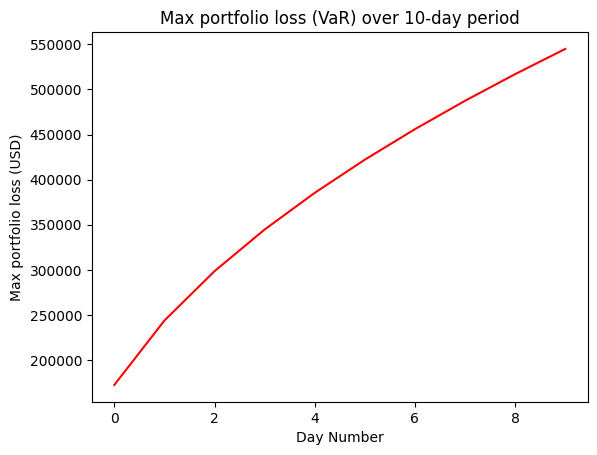

In [37]:
# Calculate 95% VaR
var = []
n = int(10)

print('\nInitial Invesment: ', "${:0,.2f}".format(I))

for x in range(1, n + 1):    
    var.append(np.round(var_1 * np.sqrt(x),2))
    print(str(x) + " Day VaR @ 95% confidence: " + str(np.round(var_1 * np.sqrt(x),2)))

# Plot
plt.xlabel('Day Number')
plt.ylabel('Max portfolio loss (USD)')
plt.title('Max portfolio loss (VaR) over 10-day period')
plt.plot(var, 'r')

## Plot VaR @ 99%


Initial Invesment:  $1,000,000.00
1 Day VaR @ 99% confidence: 245174.13
2 Day VaR @ 99% confidence: 346728.58
3 Day VaR @ 99% confidence: 424654.05
4 Day VaR @ 99% confidence: 490348.26
5 Day VaR @ 99% confidence: 548226.02
6 Day VaR @ 99% confidence: 600551.51
7 Day VaR @ 99% confidence: 648669.77
8 Day VaR @ 99% confidence: 693457.15
9 Day VaR @ 99% confidence: 735522.38
10 Day VaR @ 99% confidence: 775308.67


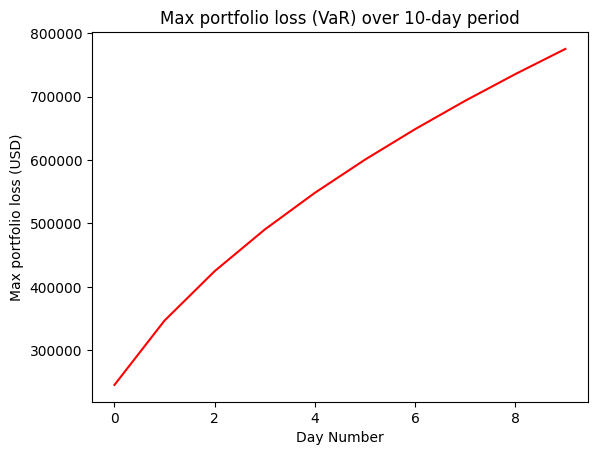

In [38]:
# Calculate 99% VaR
var2 = []
n = int(10)

print('\nInitial Invesment: ', "${:0,.2f}".format(I))

for x in range(1, n + 1):    
    var2.append(np.round(var_2 * np.sqrt(x),2))
    print(str(x) + " Day VaR @ 99% confidence: " + str(np.round(var_2 * np.sqrt(x),2)))

# Plot
plt.xlabel('Day Number')
plt.ylabel('Max portfolio loss (USD)')
plt.title('Max portfolio loss (VaR) over 10-day period')
plt.plot(var2, 'r')